In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

In [8]:
# Set max columns view
pd.set_option("display.max_columns", None)

In [3]:
# Get the Dataset
dataset = fetch_ucirepo(id=296)
X  = dataset.data.features
y = dataset.data.targets

/Users/azhar/Documents/python learning/machine_learning_practice/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [4]:
from pycaret.classification import *

# Combine into one dataframe
df = pd.concat([X, y], axis=1)

# Fix the target column (Yes/No)
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# --- PYCARET ---

# This 'setup' handles all the cleaning/encoding automatically
# We use session_id=123 to make sure we get the same results
s = setup(data=df, target='readmitted', session_id=123, verbose=False)

print("Setup Complete! Now training models...")

# Run the race
# This matches DataRobot's Leaderboard
best_model = compare_models()

Setup Complete! Now training models...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6478,0.7035,0.5745,0.6293,0.6006,0.2869,0.2878,2.7220
gbc,Gradient Boosting Classifier,0.6427,0.6968,0.5361,0.6327,0.5804,0.2730,0.2759,5.6510
rf,Random Forest Classifier,0.6396,0.6880,0.5338,0.6284,0.5772,0.2668,0.2695,4.6300
ada,Ada Boost Classifier,0.6376,0.6891,0.5235,0.6282,0.5710,0.2618,0.2651,2.6670
lr,Logistic Regression,0.6274,0.6708,0.4881,0.6221,0.5470,0.2383,0.2434,5.7170
et,Extra Trees Classifier,0.6267,0.6691,0.5178,0.6125,0.5611,0.2404,0.2430,5.3780
ridge,Ridge Classifier,0.6261,0.6683,0.4831,0.6214,0.5435,0.2353,0.2407,2.0330
lda,Linear Discriminant Analysis,0.6259,0.6682,0.4834,0.6210,0.5435,0.2349,0.2402,2.6850
nb,Naive Bayes,0.5832,0.6256,0.2573,0.6152,0.3558,0.1239,0.1502,1.9560
knn,K Neighbors Classifier,0.5765,0.5966,0.4852,0.5456,0.5136,0.1408,0.1416,4.1570


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6357,0.6943,0.5636,0.6143,0.5879,0.2626,0.2634
1,0.6362,0.6956,0.5711,0.6129,0.5913,0.2642,0.2647
2,0.6516,0.7102,0.5784,0.6336,0.6048,0.2944,0.2954
3,0.6474,0.7034,0.5842,0.6258,0.6043,0.2870,0.2875
4,0.6522,0.7080,0.5757,0.6353,0.6040,0.2952,0.2964
5,0.6545,0.7030,0.5842,0.6364,0.6092,0.3007,0.3016
6,0.6454,0.7023,0.5748,0.6255,0.5990,0.2822,0.2830
7,0.6538,0.7063,0.5739,0.6384,0.6044,0.2982,0.2995
8,0.6516,0.7074,0.5690,0.6365,0.6008,0.2934,0.2948


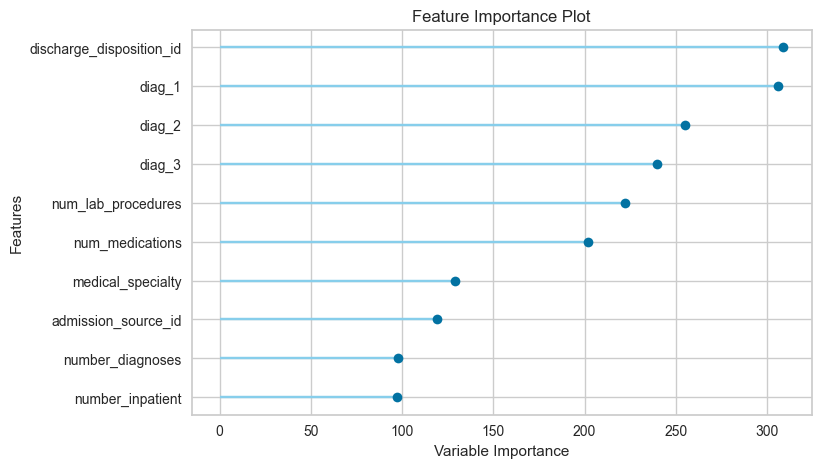

In [5]:
# 1. Create the model explicitly (since compare_models just showed us the list)
lightgbm = create_model('lightgbm')

# 2. Show me the "Feature Importance" Plot
plot_model(lightgbm, plot='feature')

In [12]:
# 1. Save the model
# This creates a file named 'final_hospital_model.pkl' in your folder
save_model(lightgbm, 'final_hospital_model')

print("Model saved successfully! Check your folder.")

Transformation Pipeline and Model Successfully Saved
Model saved successfully! Check your folder.
